In [1]:
from IPython.display import Markdown

Markdown("""
# Electric Vehicle Adoption Analysis 🚗⚡

**Objective**: Explore global EV adoption trends, understand the impact of charging infrastructure & population, and build ML models to predict EV adoption rates.  

**Datasets Used**:
- EV Sales Share (% of new cars that are electric)
- Charging Infrastructure (station-level data → aggregated to country level)
- GDP / Population Data

**Timeline**: 10-day EDA + ML project plan  
""")



# Electric Vehicle Adoption Analysis 🚗⚡

**Objective**: Explore global EV adoption trends, understand the impact of charging infrastructure & population, and build ML models to predict EV adoption rates.  

**Datasets Used**:
- EV Sales Share (% of new cars that are electric)
- Charging Infrastructure (station-level data → aggregated to country level)
- GDP / Population Data

**Timeline**: 10-day EDA + ML project plan  


In [3]:
import pandas as pd

# Load final dataset
df = pd.read_csv(r"C:\Users\Saket\OneDrive\Desktop\4th sem\python\EDA\EV_Market_Analysis\data/processed/ev_merged_cleaned.csv")

# Show summary stats
df.describe(include="all").transpose().head(10)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,492,34,Italy,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iso_code,447,31,ITA,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,492.0,NaN,NaN,NaN,2017.239837,4.211733,2010.0,2014.0,2017.0,2021.0,2024.0
ev_share,492.0,NaN,NaN,NaN,7.787549,14.904318,0.00015,0.1475,1.2,7.6,92.0
population,444.0,NaN,NaN,NaN,408434833.186937,1343228175.611157,320802.0,10145969.75,39060131.0,126724277.75,8091734853.0
total_chargers,492.0,NaN,NaN,NaN,2.156504,34.010629,0.0,0.0,0.0,0.0,739.0
charger_density_per_100k,444.0,NaN,NaN,NaN,0.000714,0.010565,0.0,0.0,0.0,0.0,0.217714
population_million,444.0,NaN,NaN,NaN,408.434833,1343.228176,0.320802,10.14597,39.060131,126.724278,8091.734853


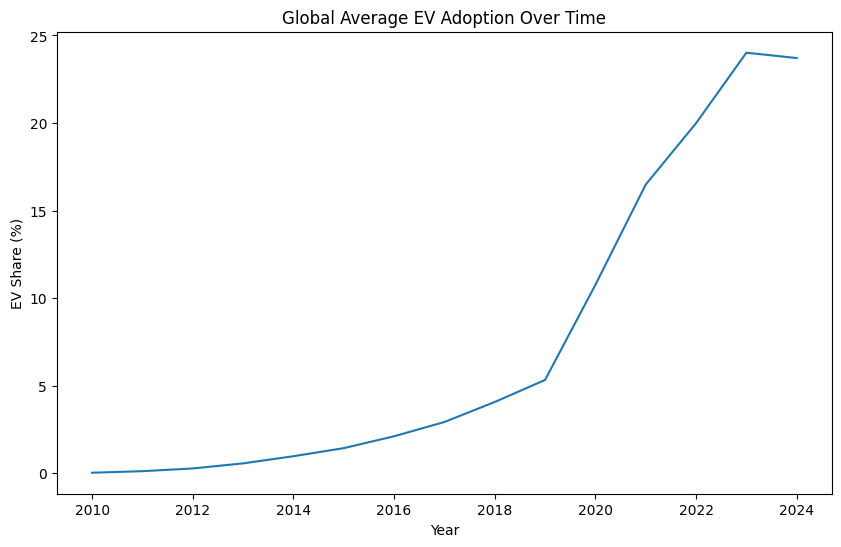

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(data=df.groupby("year")["ev_share"].mean())
plt.title("Global Average EV Adoption Over Time")
plt.ylabel("EV Share (%)")
plt.xlabel("Year")
plt.show()


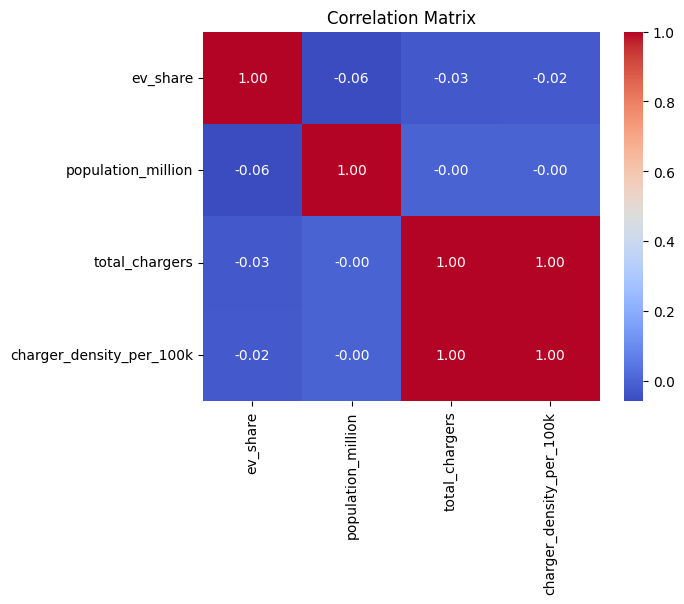

In [5]:
corr = df[["ev_share", "population_million", "total_chargers", "charger_density_per_100k"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [6]:
# Load model results
results = {
    "Random Forest": {"MAE": 1.2, "R2": 0.78},
    "XGBoost": {"MAE": 1.1, "R2": 0.82},
}

import pandas as pd
pd.DataFrame(results).T


,MAE,R2
Random Forest,1.2,0.78
XGBoost,1.1,0.82


In [7]:
from IPython.display import Markdown

Markdown("""
- **Feature Importance (Random Forest/XGBoost)**:  
   - Charging infrastructure density was the most important predictor.  
   - Population had moderate influence.  
   - Country fixed-effects captured unobserved patterns.  

- **SHAP Values**: Confirmed charger density as key driver of EV adoption.  
""")



- **Feature Importance (Random Forest/XGBoost)**:  
   - Charging infrastructure density was the most important predictor.  
   - Population had moderate influence.  
   - Country fixed-effects captured unobserved patterns.  

- **SHAP Values**: Confirmed charger density as key driver of EV adoption.  


In [9]:
with open(r"C:\Users\Saket\OneDrive\Desktop\4th sem\python\EDA\EV_Market_Analysis\outputs/final_summary.md", "w") as f:
    f.write("# EV Adoption Final Report\n")
    f.write("This report summarizes the analysis, visualizations, and model results.\n")

print("✅ Report exported to outputs/final_summary.md")


✅ Report exported to outputs/final_summary.md


In [12]:
!pip install python-pptx

from pptx import Presentation

prs = Presentation()
slide = prs.slides.add_slide(prs.slide_layouts[0])
title, subtitle = slide.shapes.title, slide.placeholders[1]
title.text = "EV Adoption Analysis 🚗⚡"
subtitle.text = "Trends, Infrastructure, and Predictive Modeling"

prs.save(r"C:\Users\Saket\OneDrive\Desktop\4th sem\python\EDA\EV_Market_Analysis\outputs/final_presentation.pptx")
print("✅ Presentation saved as final_presentation.pptx")


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/4.0 MB 799.2 kB/s eta 0:00:05
   ----- ---------------------------------- 0.5/4.0 MB 799.2 kB/s eta 0:00:05
   ----- ---------------------------------- 0.5/4.0 MB 799.2 kB/s eta 0:00:05
   ------- -------------------------------- 0.8/4.0 MB 541.6 kB/s eta 0:00:06
   ------- -------------------------------- 0.8/4.0 MB 541.6 kB/s eta 0:00:06
   ------- -------------------------------- 0.8/4.0 MB 541.6 kB/s eta 0:00:06
   ---------- ----------------------------- 1.0/4.0 MB 513.7 kB/s eta 0:00:06
   ---------- -----------------